In [1]:
import sys
sys.path.append('..')
import utils
import cholesky_method as cm
import hosking_method as hm

In [2]:
timespan = 10
interval = 0.01
paths = 10

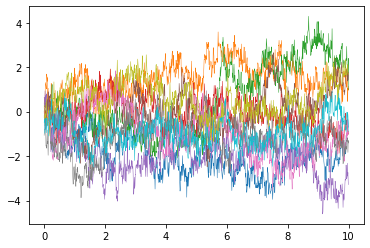

In [9]:
# Cholesky method
cm = cm.choleskyMethodfBM()
# H = 0.2
nfBm = []
for _ in range(0, paths):
    fBm = cm.generateFBm(timespan, interval, 0.2)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm, path='../figs/fBm_CD_2.pdf')

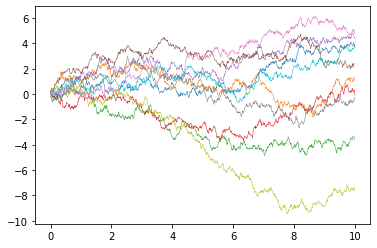

In [10]:
# H = 0.5
nfBm = []
for _ in range(0, paths):
    fBm = cm.generateFBm(timespan, interval, 0.5)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm, path='../figs/fBm_CD_5.pdf')

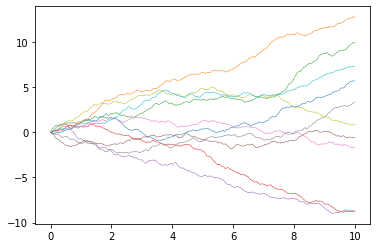

In [11]:
# H = 0.8
nfBm = []
for _ in range(0, paths):
    fBm = cm.generateFBm(timespan, interval, 0.8)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm, path='../figs/fBm_CD_8.pdf')

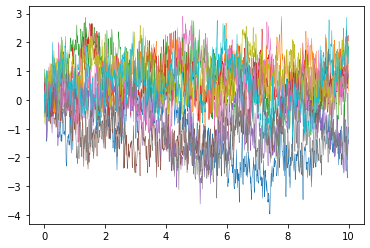

In [3]:
# Hosking method
hm = hm.hoskingMethodFBm()
# H = 0.2
nfBm = []
for _ in range(0, paths):
    fBm = hm.generateFBm(timespan, interval, 0.2)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm, path='../figs/fBm_HM_2.pdf')

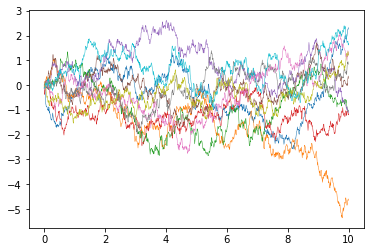

In [4]:
# H = 0.5
nfBm = []
for _ in range(0, paths):
    fBm = hm.generateFBm(timespan, interval, 0.5)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm, path='../figs/fBm_HM_5.pdf')

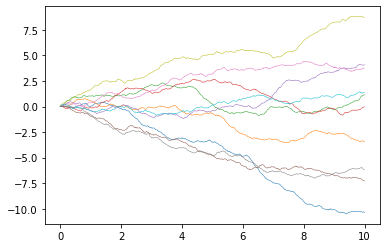

In [5]:
# H = 0.8
nfBm = []
for _ in range(0, paths):
    fBm = hm.generateFBm(timespan, interval, 0.8)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm, path='../figs/fBm_HM_8.pdf')

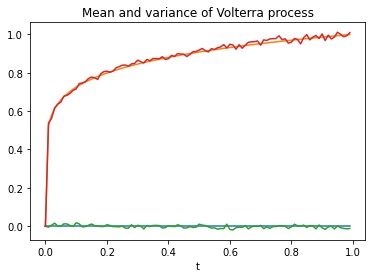

In [1]:
"""
Using rough Bergomi model to approximate the stock price:
1. Simulate the Volterra process X
"""
import rough_Bergomi_model as rBm
import numpy as np
import matplotlib.pyplot as plt
N = 10000
timespan = 1
steps = 100
interval = timespan / steps
X, dW = rBm.VolterraProcess(N, steps, interval)
# visualize the Volterra process
rBm.VolterraProcessTest(X[:, 0:steps], timespan, interval, steps)

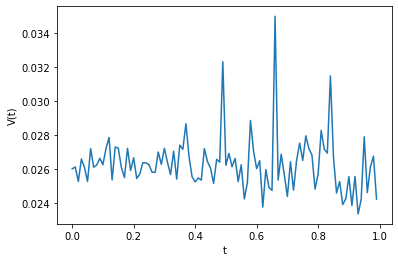

In [2]:
"""
2. Generate the spot variance
"""
VarianceP, SP, t = rBm.simulate_rBergomi_model(X, dW, timespan, interval, steps, N, 1)
rBm.VtTest(VarianceP, timespan, interval)

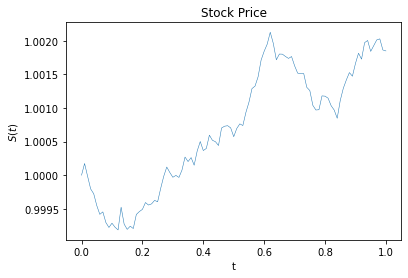

In [3]:
"""
3. Stock price
"""
SP_mean = np.mean(SP, axis=0, keepdims=True)
# utils.draw_n_paths(1, timespan + interval, interval, [SP_mean[0]], 'stock price')
fig, ax = plt.subplots()
x = np.linspace(0, timespan, int((timespan+interval) / interval))
y = SP_mean[0]
ax.plot(x, y, linewidth=0.5)
plt.xlabel('t')
plt.ylabel('$S(t)$')
plt.title('Stock Price')
plt.savefig('../figs/stock price.pdf')
plt.show()

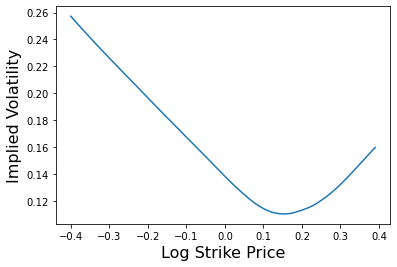

In [4]:
"""
4. Implied volatility
"""
iv = rBm.calImpliedVol(SP[:, -1], timespan)